In [39]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data = pd.read_csv("Transformed Data Set - Logistics regression.csv")

In [43]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [47]:
data.describe(include='O').T

,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


In [49]:
data['Favorite Color'].value_counts()

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [51]:
data['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [53]:
data.replace({'Gender':{'F':0,'M':1}},inplace=True)

C:\Users\niros\AppData\Local\Temp\ipykernel_12916\3460422156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'F':0,'M':1}},inplace=True)


In [55]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,1
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,1
63,Neutral,Hip hop,Doesn't drink,Fanta,1
64,Cool,Rock,Wine,Coca Cola/Pepsi,1


In [65]:
data.replace({'Favorite Color':{'Cool':0,'Neutral':1,'Warm':2}},inplace=True)

C:\Users\niros\AppData\Local\Temp\ipykernel_12916\2525658314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Favorite Color':{'Cool':0,'Neutral':1,'Warm':2}},inplace=True)


In [67]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,Rock,Vodka,7UP/Sprite,0
1,1,Hip hop,Vodka,Coca Cola/Pepsi,0
2,2,Rock,Wine,Coca Cola/Pepsi,0
3,2,Folk/Traditional,Whiskey,Fanta,0
4,0,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,0,Rock,Vodka,Coca Cola/Pepsi,1
62,0,Hip hop,Beer,Coca Cola/Pepsi,1
63,1,Hip hop,Doesn't drink,Fanta,1
64,0,Rock,Wine,Coca Cola/Pepsi,1


In [70]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()

In [74]:
data.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [76]:
for i in ['Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink']:
    data[i] = le.fit_transform(data[i])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Favorite Color        66 non-null     int64
 1   Favorite Music Genre  66 non-null     int32
 2   Favorite Beverage     66 non-null     int32
 3   Favorite Soft Drink   66 non-null     int32
 4   Gender                66 non-null     int64
dtypes: int32(3), int64(2)
memory usage: 1.9 KB


In [80]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


In [82]:
X = data.drop('Gender',axis=1)
y = data['Gender']

In [84]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [94]:
from sklearn.preprocessing import StandardScaler

In [96]:
sdc = StandardScaler()

In [98]:
for i in [X_train,X_test]:
    i = sdc.fit(i) 

In [100]:
X_train

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
49,2,2,0,1
4,0,6,3,1
62,0,2,0,1
8,2,6,2,0
5,2,3,1,2
64,0,6,5,1
59,0,4,4,3
44,0,1,0,3
41,1,4,1,0
2,2,6,5,1


In [102]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr = LogisticRegression()

In [108]:
lr.fit(X_train,y_train)

LogisticRegression()

In [110]:
y_pred = lr.predict(X_test)

In [112]:
y_pred 

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [114]:
y_test

34    1
28    0
26    0
43    1
24    0
45    1
47    1
12    0
51    1
33    1
63    1
52    1
13    0
25    0
Name: Gender, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_test,y_pred)

0.5

In [120]:
from sklearn.metrics import confusion_matrix

In [122]:
cm = confusion_matrix(y_test,y_pred)

In [124]:
cm

array([[3, 3],
       [4, 4]], dtype=int64)

In [132]:
len(y_test)

14

<Axes: >

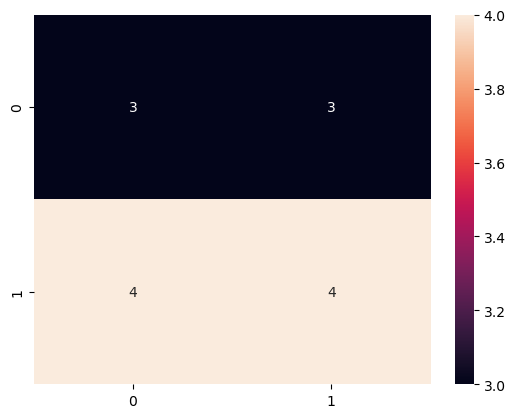

In [134]:
sns.heatmap(cm,annot=True)